# Practice Choropleth: Local Authority Districts Economic Growth  

This notebook uses the **GeoJSON** file from the [UK ONS website](https://geoportal.statistics.gov.uk/datasets/7b13dd6f2dae42f498ae6f28d42f6703_0/explore) and maps the **economic growth summary table** to verify the correctness of the geographic data.  


In [1]:
import pandas as pd  # For data manipulation and analysis
import geopandas as gpd  # For handling geographic data
import matplotlib.pyplot as plt  # For visualising the choropleth

In [2]:
lads_growth_path = "/work/data-4clusters/lad_growth_with_forecast.csv"

In [3]:
lads_growth = pd.read_csv(lads_growth_path)
lads_growth

,Region,LA Code,LA Name,Cumulative Growth,Volatility,Recent Growth
0,North East,E06000001,Hartlepool,0.058342,3.317231,-1.422630
1,North East,E06000004,Stockton-on-Tees,0.254429,3.419715,1.073313
2,North East,E06000002,Middlesbrough,0.327923,5.792579,-0.119615
3,North East,E06000003,Redcar and Cleveland,0.032452,3.509341,-1.101325
4,North East,E06000005,Darlington,1.664901,6.683238,0.443029
...,...,...,...,...,...,...
291,South West,E07000043,North Devon,0.268305,5.288026,1.110634
292,South West,E07000044,South Hams,1.021069,4.968644,2.326629
293,South West,E07000045,Teignbridge,0.267271,5.963535,2.279154
294,South West,E07000046,Torridge,0.225855,5.181734,2.035907


In [4]:
# Load the LAD geojson file
geo_path = "/work/lads_geo.geojson" 
gdf = gpd.read_file(geo_path)
gdf

,FID,LAD24CD,LAD24NM,LAD24NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,1,E06000001,Hartlepool,,447161,531473,-1.27017,54.6761,a9cbe1d9-778d-4554-85a3-3d9ed1bbd7f9,"MULTIPOLYGON (((450154.600 525938.201, 450140...."
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.5447,a59e4d92-52b8-403e-9f99-907d6e61a275,"MULTIPOLYGON (((446854.700 517192.700, 446854...."
2,3,E06000003,Redcar and Cleveland,,464330,519596,-1.00656,54.5675,f8498d74-a639-443f-bb9e-11eb475167a1,"MULTIPOLYGON (((451747.397 520561.100, 451792...."
3,4,E06000004,Stockton-on-Tees,,444940,518179,-1.30664,54.5569,5fe93391-e03e-44b9-ac57-84a300c33154,"MULTIPOLYGON (((447177.704 517811.797, 447176...."
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.5353,bb50d265-f4bd-4197-b17f-e0fcf7061aea,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...
356,357,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.6984,85a3c946-820f-40ef-9f2c-0915009aa7f1,"POLYGON ((323898.201 211287.499, 324115.698 21..."
357,358,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.7783,a4933863-8356-4e5d-860c-aa110d956585,"MULTIPOLYGON (((345897.698 180999.599, 345884...."
358,359,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.5823,b427c33a-52a1-4365-a44d-1275df3c8388,"MULTIPOLYGON (((334186.001 192669.398, 334201...."
359,360,W06000023,Powys,Powys,302329,273254,-3.43531,52.3486,b7b47a63-c005-4be7-bd5d-274ea1074e55,"POLYGON ((322392.901 334017.198, 322378.002 33..."


In [5]:
# Merge the geodataframe with the summary table
cumulative_df = gdf.merge(lads_growth, left_on="LAD24CD", right_on="LA Code", how="left")



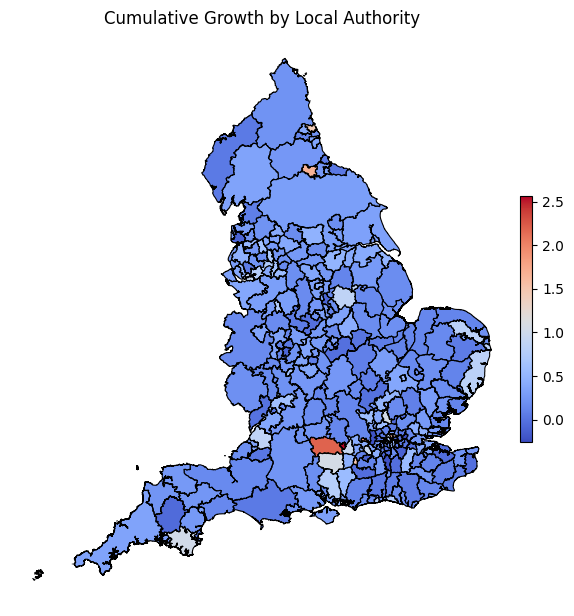

In [6]:
fig, ax = plt.subplots(figsize=(8, 8)) 
plt.subplots_adjust(left=0.1, right=0.85) 

# Plot the choropleth with a smaller legend
cumulative_df.plot(column="Cumulative Growth", cmap="coolwarm", linewidth=0.8, edgecolor="black",
         legend=True, legend_kwds={"shrink": 0.4, "aspect": 20, "pad": 0.01}, ax=ax)

ax.set_title("Cumulative Growth by Local Authority")
ax.axis("off")

plt.show()

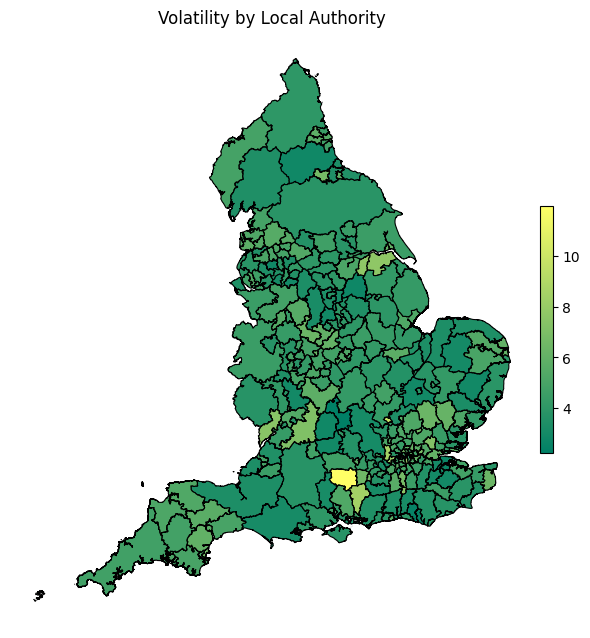

In [7]:
fig, ax = plt.subplots(figsize=(8, 8)) 
plt.subplots_adjust(left=0.07, right=0.85) 

# Plot the choropleth with a smaller legend
cumulative_df.plot(column="Volatility", cmap="summer", linewidth=0.8, edgecolor="black",
         legend=True, legend_kwds={"shrink": 0.4, "aspect": 20, "pad": 0.01}, ax=ax)

ax.set_title("Volatility by Local Authority")
ax.axis("off")

plt.show()

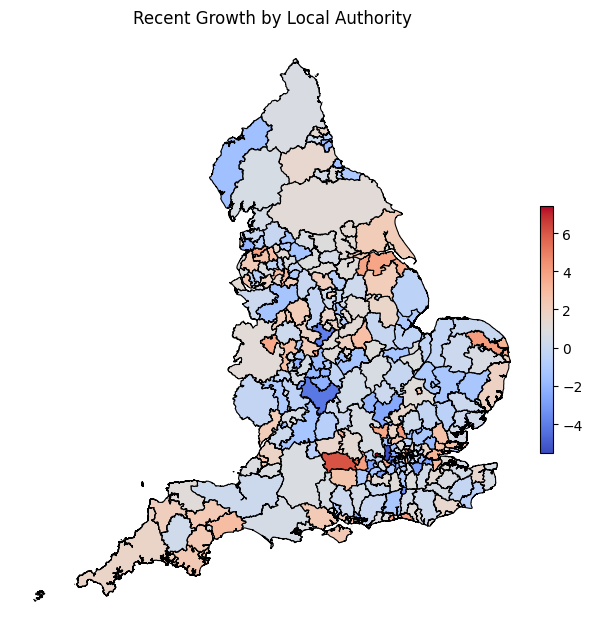

In [17]:
fig, ax = plt.subplots(figsize=(8, 8)) 
plt.subplots_adjust(left=0.07, right=0.85) 

# Plot the choropleth with a smaller legend
cumulative_df.plot(column="Recent Growth", cmap="coolwarm", linewidth=0.8, edgecolor="black",
         legend=True, legend_kwds={"shrink": 0.4, "aspect": 20, "pad": 0.01}, ax=ax)

ax.set_title("Recent Growth by Local Authority")
ax.axis("off")

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cfb480dc-687e-4482-b857-be10c729aa58' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>